# Data Wrangling II
Create an “Academic performance” dataset of students and perform the following operations
using Python.
1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them.
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable
techniques to deal with them.
3. Apply data transformations on at least one of the variables. The purpose of this
transformation should be one of the following reasons: to change the scale for better
understanding of the variable, to convert a non-linear relation into a linear one, or to
decrease the skewness and convert the distribution into a normal distribution.
Reason and document your approach properly.

In [1]:
import pandas as pd
data=pd.read_csv("StudentsPerformance.csv")
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [2]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df=pd.DataFrame(data)

In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
df = df.dropna(how="any",axis=0)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


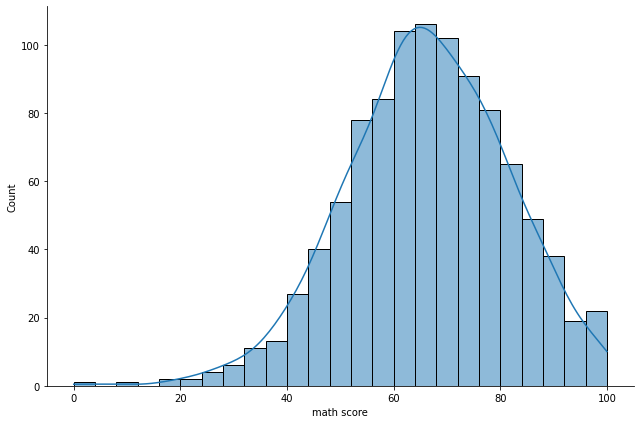

In [8]:
sns.displot(data=df['math score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

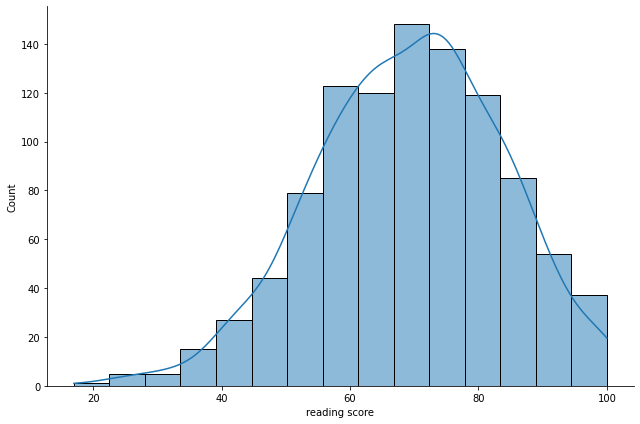

In [9]:
sns.displot(data=df['reading score'],bins=15,height=6,kind='hist',aspect=1.5,kde=True)

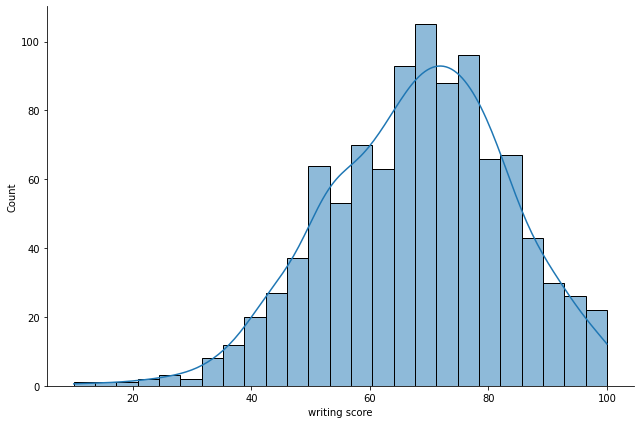

In [10]:
sns.displot(data=df['writing score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

In [11]:
df1=df.copy()

In [12]:
#As all the three scores have median ~ mode
#The data points which fall below mean-3*(std.dev.) or above mean+3*(std.dev.) are outliers.
#Z-Score Treatment
def trim(col:pd.core.series.Series):
    upperLimit = col.mean() + 3 * col.std()
    lowerLimit = col.mean() - 3 * col.std()
    newCol = col[(col < upperLimit) & (col > lowerLimit)]
    return newCol

In [13]:
df1["math score"]=trim(df1["math score"])
df1["writing score"]=trim(df1["writing score"])
df1["reading score"]=trim(df1["reading score"])

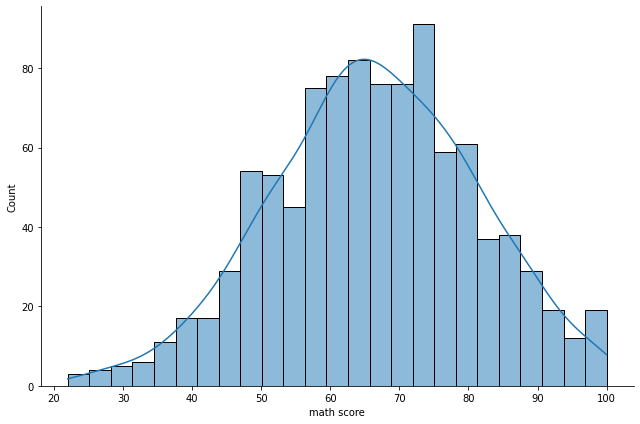

In [14]:
sns.displot(data=df1['math score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

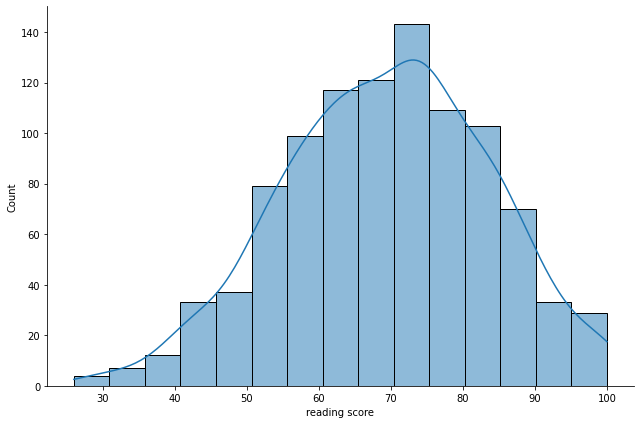

In [17]:
sns.displot(data=df1['reading score'],bins=15,height=6,kind='hist',aspect=1.5,kde=True)

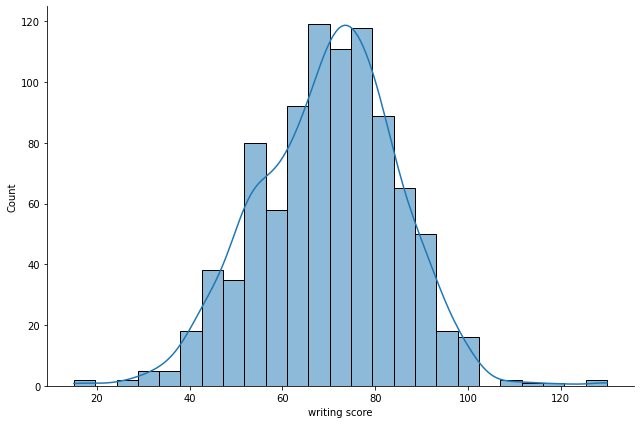

In [28]:
sns.displot(data=df1['writing score'],bins=25,height=6,kind='hist',aspect=1.5,kde=True)

In [30]:
#converting categorical to numeric
df1= pd.get_dummies(df1)
df1.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72.0,72.0,74.0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,90.0,95.0,93.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,76.0,78.0,75.0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,71.0,83.0,78.0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,88.0,95.0,92.0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,40.0,43.0,99.0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,64.0,64.0,77.0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,38.0,60.0,88.0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
10,58.0,54.0,98.0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
11,40.0,52.0,71.0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


In [32]:
from sklearn.preprocessing import QuantileTransformer

In [33]:
scaler = QuantileTransformer(n_quantiles=len(df1))
new_df = df1.copy()
col_names = ['math score','reading score','writing score']
features = new_df[col_names]

In [34]:
new_df[col_names] = scaler.fit_transform(features.values)
new_df[col_names].describe()

,math score,reading score,writing score
count,935.000000,934.000000,927.000000
mean,0.500015,0.500065,0.499980
std,0.288994,0.289119,0.289042
min,0.000000,0.000000,0.000000
25%,0.252935,0.258805,0.252401
50%,0.495197,0.497332,0.501067
75%,0.750800,0.747065,0.751334
max,1.000000,1.000000,1.000000


In [35]:
new_df.head(10)

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,0.641409,0.549093,0.589648,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
2,0.953042,0.973853,0.952508,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0.739061,0.722519,0.620598,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
5,0.619530,0.822305,0.702241,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1
6,0.936499,0.973853,0.943970,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
7,0.036820,0.038420,0.981323,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1
8,0.436499,0.350053,0.675560,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
9,0.026147,0.258805,0.895945,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1
10,0.275347,0.144610,0.978122,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1
11,0.036820,0.114194,0.501067,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

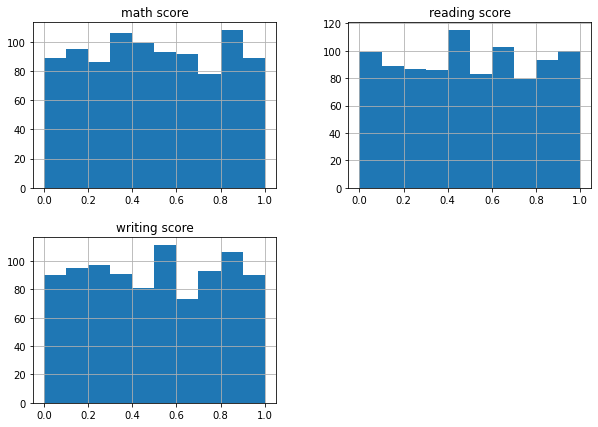

In [44]:
new_df[col_names].hist(figsize=(10,7))